# Classificador do tipo de comentário - Imdb Review

Esse projeto será desenvolvido com foco em ampliar o conhecimento sobre inteligência artificial. Com o objetivo de analisar e classificar um sentimento de um texto como positivo, negativo ou neutro, foi escolhido o conjunto de dados do Imdb que contém review dos espectadores e o sentimento que eles tiveram ao comentar a review.
Teremos as seguintes partes do projeto:
- [x] Pré-processamento de dados;
- [x] Exploração dos dados;
- [X] Vetorização dos textos;
- [X] Modelagem;
- [x] Treinamento e avaliação;
- [] Ajustes e otimização;
- [] Visualização de Resultados.

## Bibliotecas

In [19]:
%pip install nltk
%pip install beautifulsoup4


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
import nltk

from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
from bs4 import BeautifulSoup
from wordcloud import WordCloud 
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Inteli\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Inteli\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [3]:
# importando dataset
df = pd.read_csv('./dataset/imdb_dataset.csv')
df

review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]

## Pré-processamento dos dados

Nessa etapa será realizado a limpeza dos textos e a remoção de stopwords e caracteres especiais.

In [4]:
# verificando valores nulos
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [5]:
corpo = []

for i in range(len(df)):
    # Utilizar BeautifulSoup para remover tags HTML
    soup = BeautifulSoup(df['review'][i], 'html.parser')
    text = soup.get_text()

    # Remover caracteres especiais, incluindo '$'
    text = re.sub('[^a-zA-Z]', ' ', text)

    # Remover espaços extras
    text = ' '.join(text.split())

    # Converter para minúsculas
    text = text.lower()

    # Tokenização
    words = text.split()

    # Lematização e remoção de stopwords
    wl = WordNetLemmatizer()
    words = [wl.lemmatize(word) for word in words if word not in set(stopwords.words('english'))]

    # Unir palavras tokenizadas
    text = ' '.join(words)

    corpo.append(text)

C:\Users\Inteli\AppData\Local\Temp\ipykernel_38184\2799716848.py:5: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(df['review'][i], 'html.parser')


In [6]:
print(corpo[:5])

['one reviewer mentioned watching oz episode hooked right exactly happened first thing struck oz brutality unflinching scene violence set right word go trust show faint hearted timid show pull punch regard drug sex violence hardcore classic use word called oz nickname given oswald maximum security state penitentary focus mainly emerald city experimental section prison cell glass front face inwards privacy high agenda em city home many aryan muslim gangsta latino christian italian irish scuffle death stare dodgy dealing shady agreement never far away would say main appeal show due fact go show dare forget pretty picture painted mainstream audience forget charm forget romance oz mess around first episode ever saw struck nasty surreal say ready watched developed taste oz got accustomed high level graphic violence violence injustice crooked guard sold nickel inmate kill order get away well mannered middle class inmate turned prison bitch due lack street skill prison experience watching oz 

## Exploração dos dados

Aqui podemos criar algumas perguntas para avaliar com a exploração:
- Quais são as palavras mais frequentes?
- Quais são as palavras mais frequentes para cada sentimento?
- Tamanho da review vs sentimento;
- A forma de escrita têm influência no sentimento?

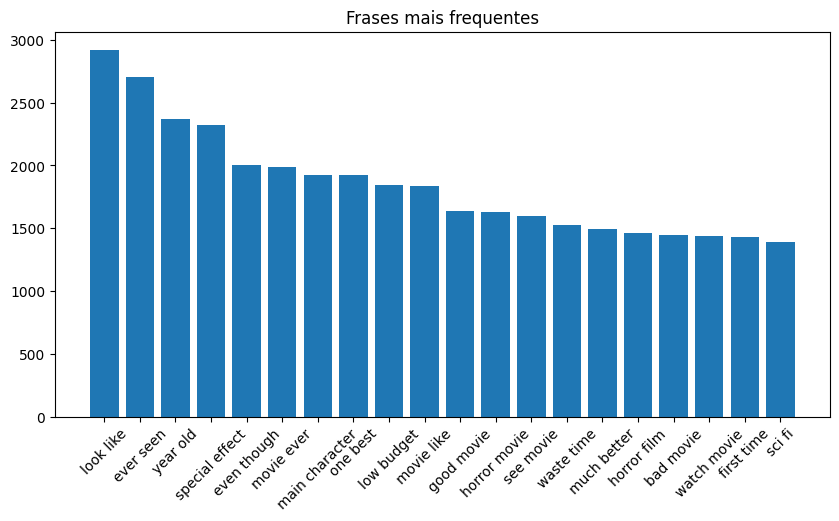

In [7]:
# Quais são as palavras mais frequentes?

# Considerando que 'corpo' é uma lista de revisões
vectorizer = CountVectorizer(ngram_range=(2, 2))  # ngram_range=(2, 2) para bigramas (frases de duas palavras)
X = vectorizer.fit_transform(corpo)
freqs = zip(vectorizer.get_feature_names_out(), X.sum(axis=0).tolist()[0])    
freqs = sorted(freqs, key=lambda x: -x[1])

# Convertendo para DataFrame para melhor visualização
df_freqs = pd.DataFrame(freqs, columns=['phrase', 'frequency']).head(20)

# Plotagem
plt.figure(figsize=(10, 5))
plt.bar(df_freqs['phrase'], df_freqs['frequency'])
plt.xticks(rotation=45)
plt.title('Frases mais frequentes')
plt.show()

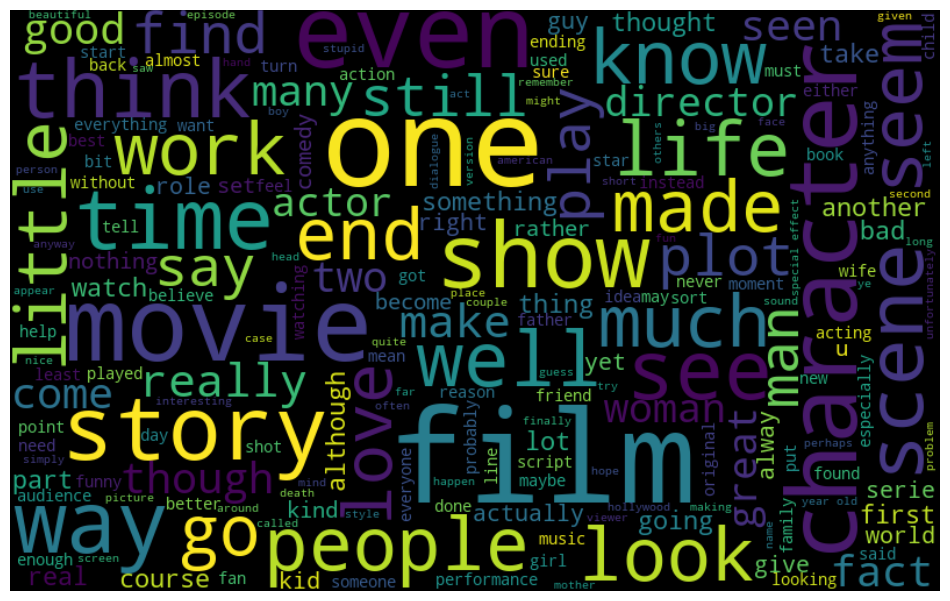

In [8]:
# quais são as palavras mais frequentes?
# nuvem de palavras -> wordcloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(str(corpo))
fig = plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

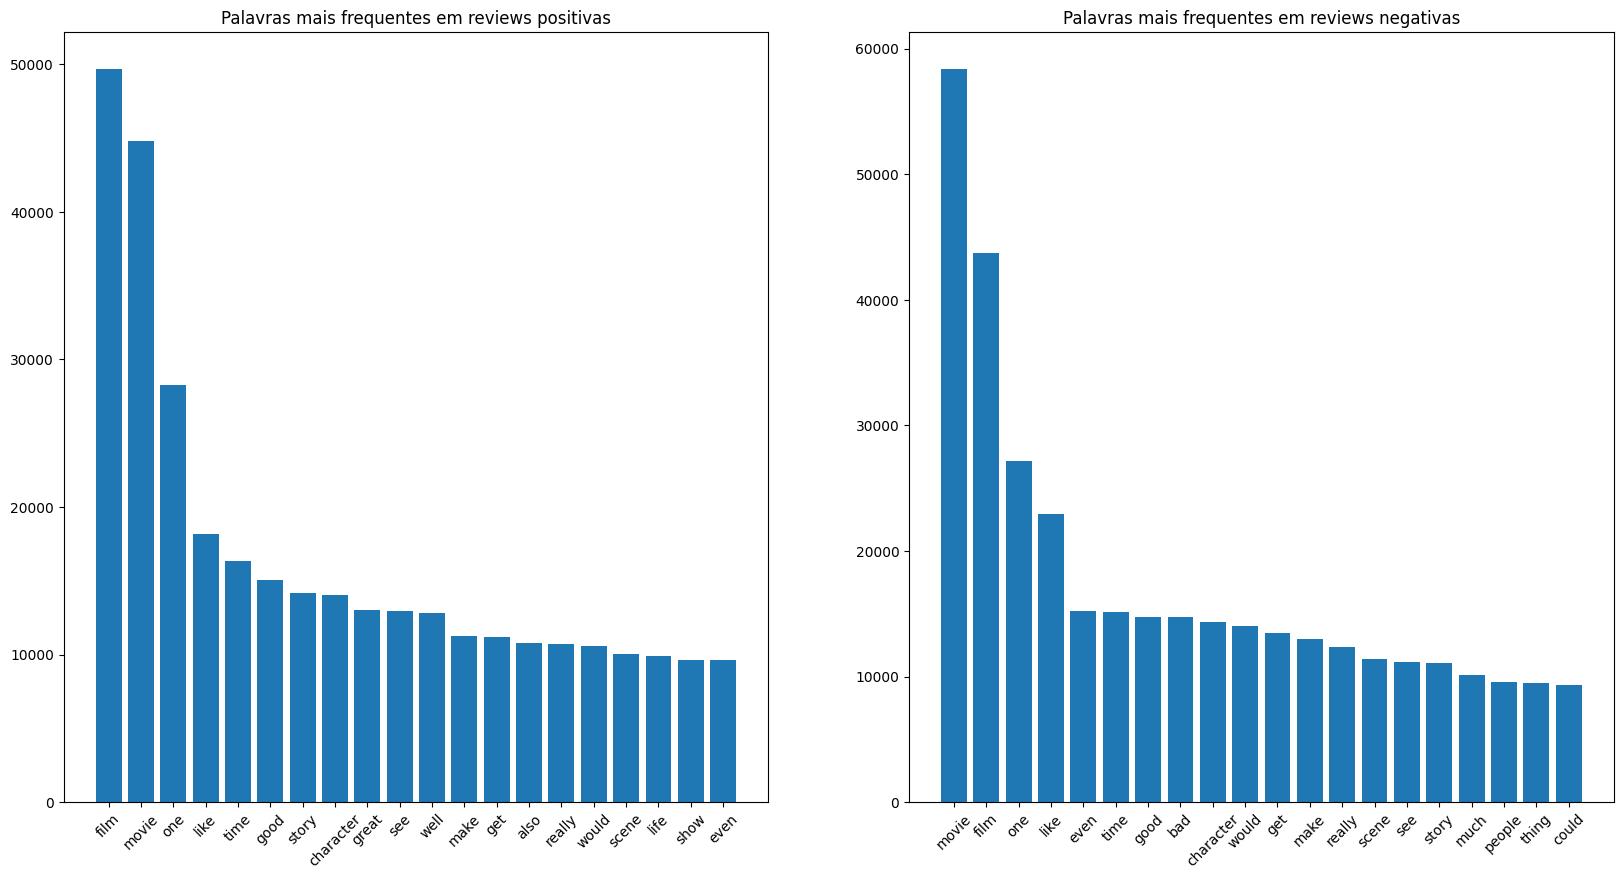

In [9]:
# quais são as palavras mais frequentes para cada sentimento?

# Dividindo o conjunto de dados por sentimento
positive_reviews = [text for text, sentiment in zip(corpo, df['sentiment']) if sentiment == 'positive']
negative_reviews = [text for text, sentiment in zip(corpo, df['sentiment']) if sentiment == 'negative']

# Contando as palavras mais frequentes para cada sentimento
positive_freq = Counter(" ".join(positive_reviews).split()).most_common(20)
negative_freq = Counter(" ".join(negative_reviews).split()).most_common(20)

# Convertendo para DataFrame
df_positive_freq = pd.DataFrame(positive_freq, columns=['word', 'frequency'])
df_negative_freq = pd.DataFrame(negative_freq, columns=['word', 'frequency'])

# Plotagem
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

axes[0].bar(df_positive_freq['word'], df_positive_freq['frequency'])
axes[0].set_title('Palavras mais frequentes em reviews positivas')
axes[0].tick_params(axis='x', rotation=45)

axes[1].bar(df_negative_freq['word'], df_negative_freq['frequency'])
axes[1].set_title('Palavras mais frequentes em reviews negativas')
axes[1].tick_params(axis='x', rotation=45)

plt.show()



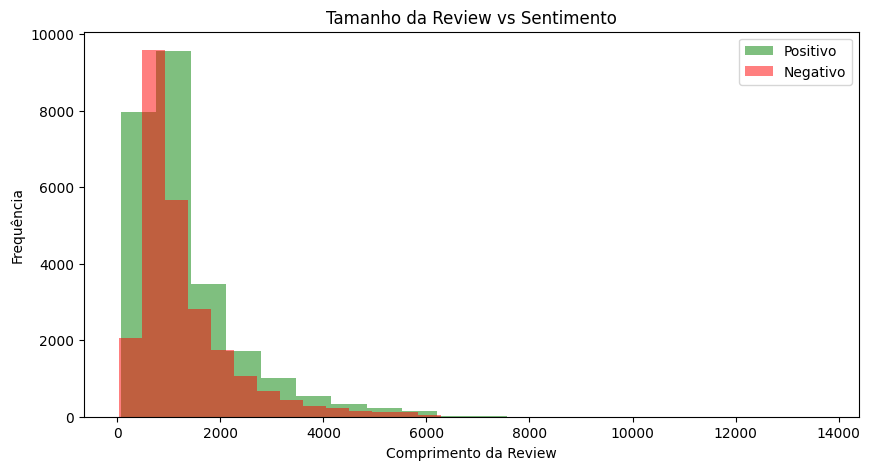

In [10]:
# tamanho da review vs sentimento

plt.figure(figsize=(10, 5))

# Histogramas para cada sentimento
plt.hist(df[df['sentiment'] == 'positive']['review'].str.len(), bins=20, alpha=0.5, label='Positivo', color='green')
plt.hist(df[df['sentiment'] == 'negative']['review'].str.len(), bins=20, alpha=0.5, label='Negativo', color='red')

plt.xlabel('Comprimento da Review')
plt.ylabel('Frequência')
plt.title('Tamanho da Review vs Sentimento')
plt.legend(loc='upper right')
plt.show()

In [11]:
# quantas reviews negativas e quantas positivas
df.sentiment.value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

## Aplicar texto tratado ao dataset

In [12]:
df['review'] = corpo
df.head()

review sentiment
0  one reviewer mentioned watching oz episode hoo...  positive
1  wonderful little production filming technique ...  positive
2  thought wonderful way spend time hot summer we...  positive
3  basically family little boy jake think zombie ...  negative
4  petter mattei love time money visually stunnin...  positive

## Separando treino e teste

In [14]:
X = df['review']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

## Vetorização dos textos

Trabalhar com textos é diferente de modelar um conjunto de variáveis numéricas. É preciso fazer a máquina interpretar o texto, ou seja, representar textos de forma numérica.

Uma das formas mais básicas de criar essas representações são as vetorizações por frequência. Ou seja, utilizar informações de quantidade de aparição das palavras.

Aqui serão utilizados modelos de vetorização, fique atento!
Utilize somente um modelo

### Bag of Words

Esse método ocnsiste em definir a frequência em que cada palavra do vocabulário estão presentes em cada frase. Vocabulário = conjunto de todas as palavras distintas

Iremos definir nosso código da seguinte forma:
- Definir vocabulário como todas as N palavras distintas da base;
- Para cada base de dados (treino e teste), conte quantas vezes cada palavras aparece na frase em questão;
- Crie vetores para cada frase, onde o vetor será de dimensão (1,N), onde cada posição será a quantidade de vezes que a palavra aparece na frase.

In [31]:
N = 500  # Defininção o número de features

cv = CountVectorizer(max_features = N)

cv_train_features = cv.fit_transform(X_train)
cv_test_features = cv.transform(X_test)

### TF-IDF - Term-Frequency Inverse-Document-Frequency

Esse algoritmo pondera as palavras importantes, considera a frequência com que cada palavra "p" aparece na frase "f". Basicamente, o TF-IDF permite com que palavras que aparecem em muitos documentos, tenham pesos menores, indicando que não são variáveis dsicriminatórias.

In [32]:
N = 500 # Defininção o número de features

tfidf = TfidfVectorizer(max_features = N)

tf_train_features = tfidf.fit_transform(X_train)
tf_test_features = tfidf.transform(X_test)

## Modelagem

### Linear Regression

In [33]:
# Bag of Words
lr_cv = LogisticRegression(random_state = 42)

lr_cv.fit(cv_train_features, y_train)

accuracy_score(y_test, lr_cv.predict(cv_test_features))

0.8417

In [36]:
# TF-IDF
lr_tf = LogisticRegression(random_state = 42)

lr_tf.fit(tf_train_features, y_train)

accuracy_score(y_test, lr_tf.predict(tf_test_features))

0.8445

### DecisionTree

In [34]:
# Bag pf Words
treeUCV = DecisionTreeClassifier(random_state = 42)

treeUCV.fit(cv_train_features, y_train)

predictions = treeUCV.predict(cv_test_features)

accuracy_score(y_test, predictions)

0.7078

In [37]:
# TF-IDF
treeUTF = DecisionTreeClassifier(random_state = 42)

treeUTF.fit(tf_train_features, y_train)

predictions = treeUTF.predict(tf_test_features)

accuracy_score(y_test, predictions)

0.7116

### Random Forest

In [35]:
# Bag of Words
rfc_uni = RandomForestClassifier(random_state = 42)

rfc_uni.fit(cv_train_features, y_train)

predictions = rfc_uni.predict(cv_test_features)

accuracy_score(y_test, predictions)

0.8106

In [38]:
# TF-IDF

rfc_uni = RandomForestClassifier(random_state = 42)

rfc_uni.fit(tf_train_features, y_train)

predictions = rfc_uni.predict(tf_test_features)

accuracy_score(y_test, predictions)

0.8158

Ao final da predição, será selecionado o melhor modelo e a partir desse modelo o código abaixo irá realizar a predição mostrando se a review foi negativa ou positiva.

In [39]:
# Mostre as previsões para cada revisão
for i, (review, prediction) in enumerate(zip(X_test, predictions)):
    sentiment = "positive" if prediction == "positive" else "negative"
    print(f"Review {i} - Sentimento: {sentiment}, Predição: {prediction}, Texto: {review}")

Review 0 - Sentimento: negative, Predição: negative, Texto: wonder many mini cooper automobile sold thanks movie help add sale little car featured film along attractive cast entertaining heist chase film feature cool cast mark wahlberg charlize theron edward norton seth green jason statham best chase scene right beginning boat pursuit venice italy film overdo violence pretty intelligent script short exception feature interesting character nicely firmed cat mouse game norton theron character suspenseful fun watch however manipulated rooting criminal portrayed good guy many time happened since day butch cassidy sundance kid twisted hollywood one criminal norton stole killed leader father figure donald sutherland gang worst bunch film villain also theron character typically overblown feminist mode hollywood woman thing including driving car better man third minor irritation seth green smug smart as attitude also supposed go along hip cool despite hindrance extremely entertaining movie als

## Ajustes e Otimização